In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/Users/MYK/Desktop/IRES/scripts')

import numpy as np
import matplotlib.pyplot as plt
import utils as u
import fake_profile as fp

# Pick standard profile, say ind0, and take ratio of others against it

In [2]:
profs = np.loadtxt('../data/J0332_profs.txt')
mjd = np.loadtxt('../data/J0332_MJD.txt')

standard = profs[0]
#start from [1:] cus we don't need ratio of standard against itself
ratios = np.vstack(tuple(i/standard for i in profs[1:])) 

#NO NEED FOR THIS BELOW because we will compare against ratio of WN, so now both have unity mean
#because in significance testing, we perform pointwise test against WN, need to make ratios have a zero mean
#for i, val in enumerate(ratios):
#    ratios[i] = val-val.mean()

(300, 370)

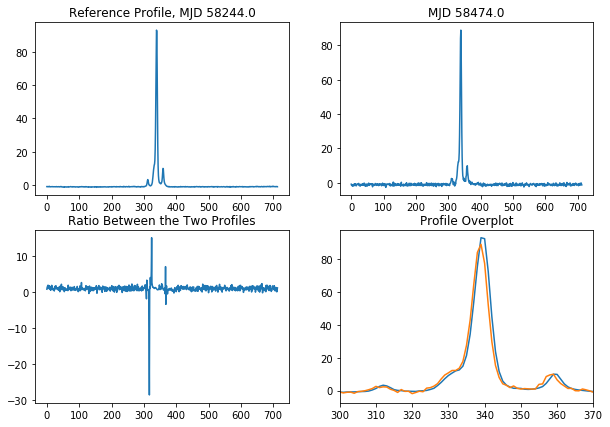

In [3]:
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ind = np.where(mjd == 58474.)[0][0]

ax1.plot(standard)
ax2.plot(profs[ind])
ax3.plot(ratios[ind-1])
ax4.plot(profs[0]); ax4.plot(profs[ind])

ax1.set_title("Reference Profile, MJD {}".format(mjd[0]))
ax2.set_title("MJD {}".format(mjd[ind]))
ax3.set_title("Ratio Between the Two Profiles")
ax4.set_title("Profile Overplot")
ax4.set_xlim(300,370)

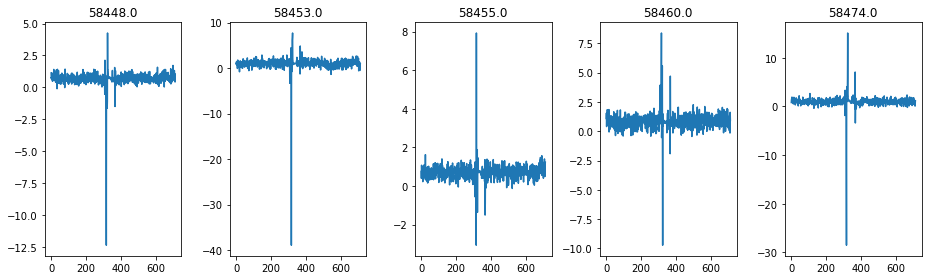

In [4]:
u.gridplot(ratios[40:45,], 5, hist=False, figsize=(13, 4), mjd=mjd[41:46])

### MJD 58453 is almost identical to null profile! use this to possibly see validity of wavelet test

In [5]:
ind1 = np.where(mjd == 58265.)[0][0]
ind2 = np.where(mjd == 58632.)[0][0]
plt.plot(diffs[ind1-1])
plt.plot(diffs[ind2-1], 'r')
plt.xlim(300,400)

NameError: name 'diffs' is not defined

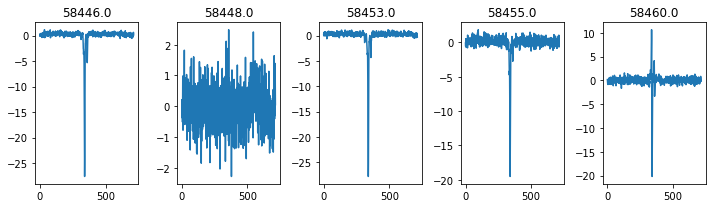

In [6]:
diffs = np.vstack(tuple(i-standard for i in profs[1:])) 

u.gridplot(diffs[40:45], 5, hist=False, figsize=(10, 3), mjd=mjd[40:45])

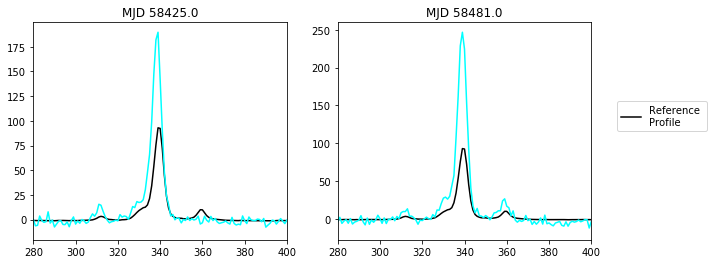

In [9]:
fig = plt.figure(figsize=(10, 4))
#ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(121)
ax3 = fig.add_subplot(122)

#ind1 = np.where(mjd == 58365.)[0][0]
ind2 = np.where(mjd == 58425.)[0][0]
ind3 = np.where(mjd == 58481.)[0][0]

#ax1.plot(profs[0], 'k', label='Reference \nProfile'); ax1.plot(profs[ind1], 'cyan')
ax2.plot(profs[0], 'k', label='Reference \nProfile'); ax2.plot(profs[ind2], 'cyan')
ax3.plot(profs[0], 'k', label='Reference \nProfile'); ax3.plot(profs[ind3], 'cyan')

#ax1.set_title("MJD {}".format(mjd[ind1]))
ax2.set_title("MJD {}".format(mjd[ind2]))
ax3.set_title("MJD {}".format(mjd[ind3]))

#ax1.set_xlim(280,400)
ax2.set_xlim(280,400)
ax3.set_xlim(280,400)

#ax1.set_ylim(-10,250)
#ax2.set_ylim(-10,250)
#ax3.set_ylim(-10,250)

plt.legend(loc=(1.1, .5), prop={'size':10})

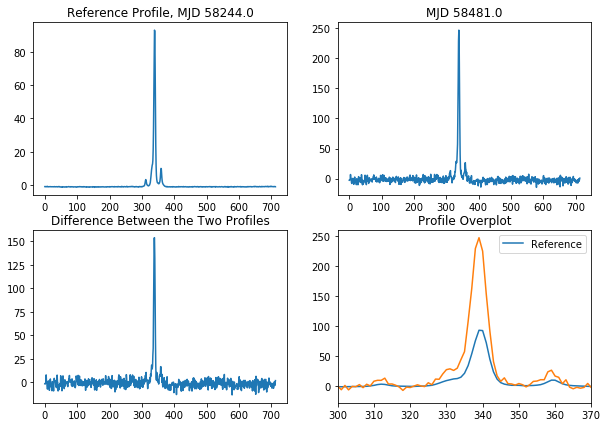

In [16]:
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ind = np.where(mjd == 58481.)[0][0]

ax1.plot(standard)
ax2.plot(profs[ind])
ax3.plot(diffs[ind-1])
ax4.plot(profs[0], label='Reference'); ax4.plot(profs[ind])

ax1.set_title("Reference Profile, MJD {}".format(mjd[0]))
ax2.set_title("MJD {}".format(mjd[ind]))
ax3.set_title("Difference Between the Two Profiles")
ax4.set_title("Profile Overplot")
ax4.set_xlim(300,370)
plt.legend()
#ax4.set_ylim(90, 100)

(300, 370)

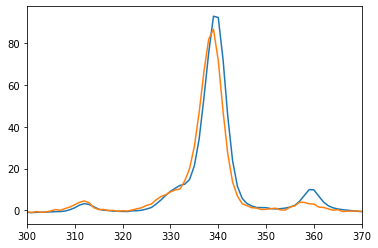

In [62]:
plt.plot(profs[0]); plt.plot(profs[ind])
plt.xlim(300,370)

In [38]:
np.savetxt('../R_wavelet/J0332_ratios.txt', ratios)
np.savetxt('../R_wavelet/J0332_diffs.txt', diffs)

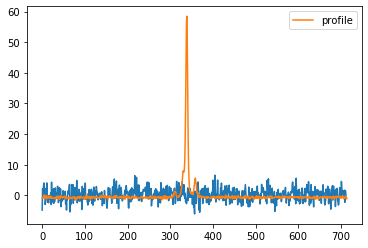

In [153]:
plt.plot(np.random.randn(714)*2)
plt.plot(profs[50], label='profile')
plt.legend()

In [154]:
a = np.random.randn(100)*5 / np.random.randn(100)*5
b = np.random.randn(100) / np.random.randn(100)

(array([ 1.,  2.,  6., 45., 38.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.29075895e+01, -9.68559562e+00, -6.46360172e+00, -3.24160782e+00,
        -1.96139228e-02,  3.20237997e+00,  6.42437387e+00,  9.64636777e+00,
         1.28683617e+01,  1.60903556e+01,  1.93123495e+01,  2.25343434e+01,
         2.57563373e+01,  2.89783312e+01,  3.22003251e+01,  3.54223190e+01,
         3.86443128e+01,  4.18663067e+01,  4.50883006e+01,  4.83102945e+01,
         5.15322884e+01]),
 <a list of 20 Patch objects>)

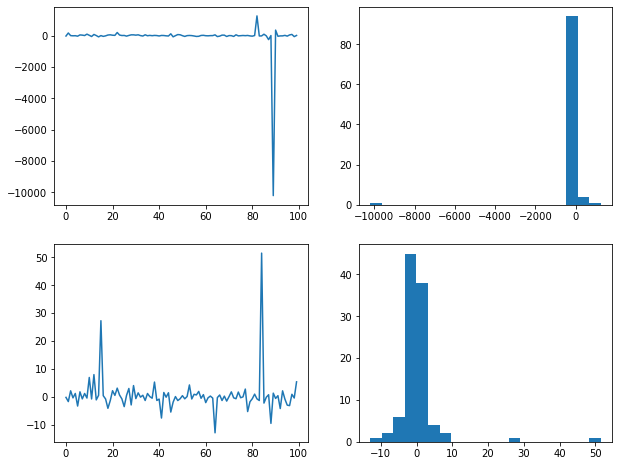

In [160]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(a)
ax2.hist(a, bins=20)
ax3.plot(b)
ax4.hist(b, bins=20)


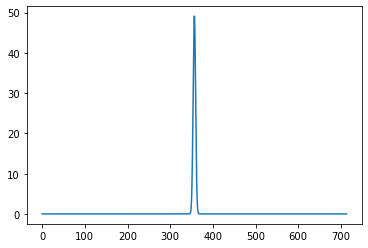

In [28]:
amp = [50]
mu = [50]
sd = [.4]

gaus = fp.fake_profile(amp, mu, sd, nbins=714); gaus.construct_profile()
plt.plot(gaus.profile)

In [29]:
np.savetxt('../R_wavelet/gaussian.txt', gaus.profile)

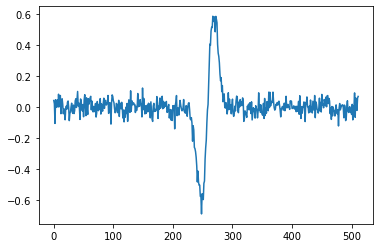

In [63]:
a = fp.fake_profile([10], [50], [2]); a.construct_profile(noise=True)
b = fp.fake_profile([10], [51], [2]); b.construct_profile(noise=True)
plt.plot(b.profile-a.profile)

In [13]:
diffs = np.loadtxt('../R_wavelet/J0332_diffs.txt')

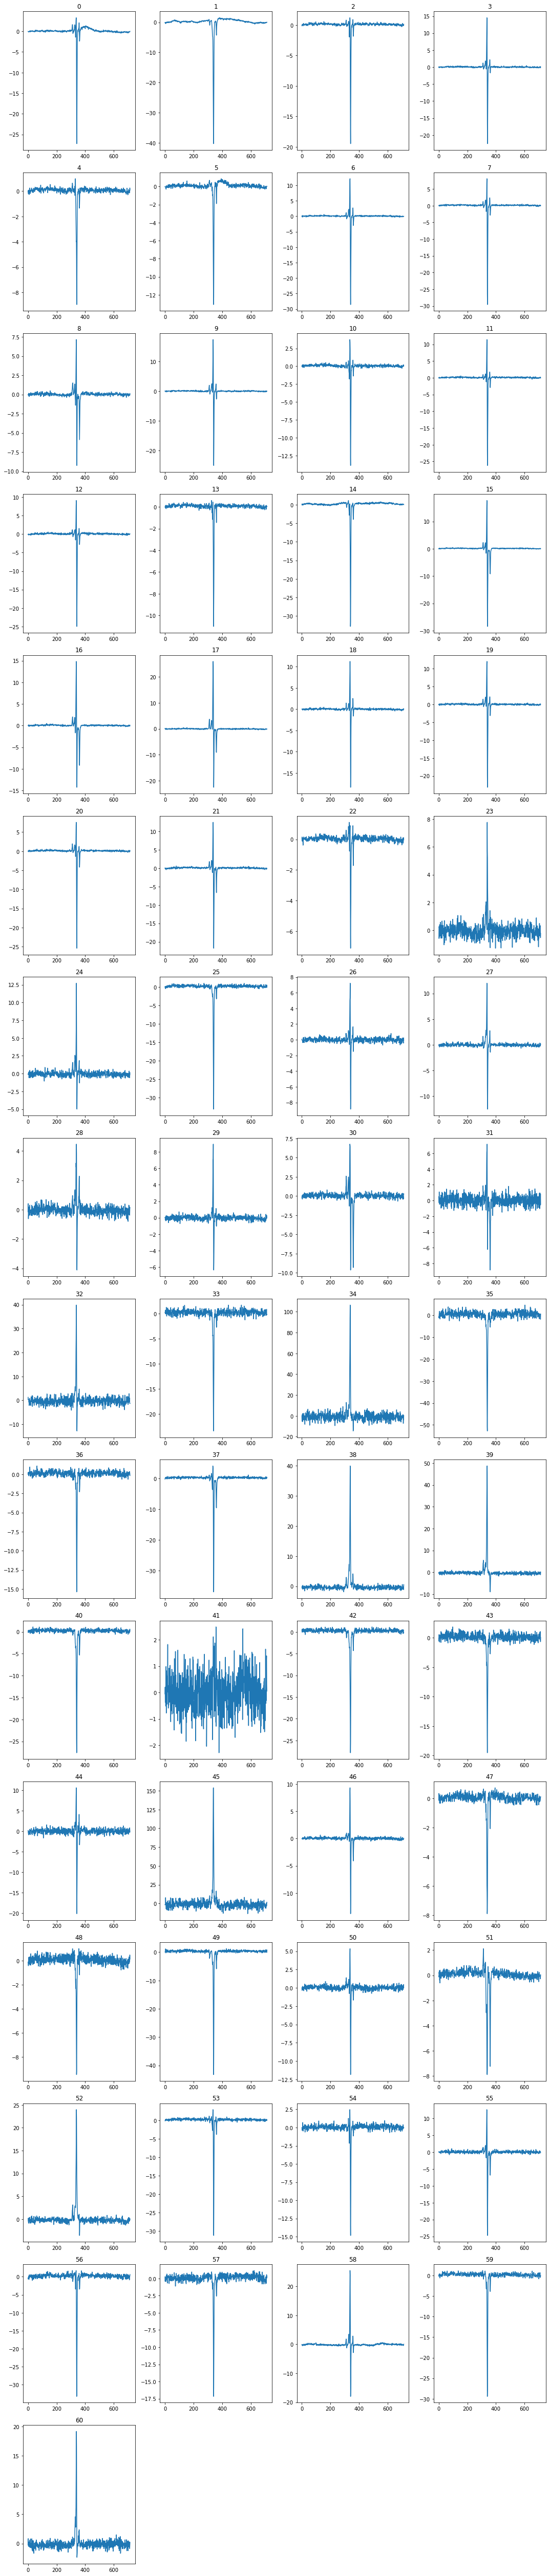

In [14]:
u.gridplot(diffs, 4, hist=False)